In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
from datetime import timedelta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
class Person:
    def __init__(self, ID, name, last_name, birthday, credit,AAPL,AMZN,FB,GOOGL,TSLA):
        self.name=name
        self.last_name=last_name
        self.ID=ID
        self.birthday=birthday
        self.credit=float(credit)
        self.pAssets={'AAPL':AAPL,'AMZN':AMZN,'FB':FB,'GOOGL':GOOGL,'TSLA':TSLA}

In [3]:
market=pd.read_csv("stock_market_data.csv")
market=market.sort_values(by=['Date', 'Symbol'])
market=market.reset_index()
market['index']=market.index
market.head()


,index,Date,Symbol,Open,Volume
0,0,2009-12-31,AAPL,7.622500,493729600.0
1,1,2009-12-31,AMZN,136.250000,7599900.0
2,2,2009-12-31,FB,42.049999,573576400.0
3,3,2009-12-31,GOOGL,313.788788,3908488.0
4,4,2009-12-31,TSLA,3.800000,93831500.0


In [4]:
#x=float(market.iloc[market.loc[market['Date']=='2009-12-31'][market['Symbol']=='AAPL'].index]['Open'].values)

In [5]:
print("Enter date:")
y,m,d = input().split('/')
dd = datetime.datetime(int(y), int(m), int(d))
print(dd)

Enter date:
2016/10/12
2016-10-12 00:00:00


In [6]:
f = open("Accounts.txt", "a")
f.close()
f = open("temp_Accounts.txt", "a")
f.close()

In [7]:
def Check_ID(ID):
    f = open("Accounts.txt")
    while True:
        s=f.readline()
        l=s.split(',')
        if l[0]==ID:
            f.close()
            return l
        elif s=="":
            f.close()
            return False
def Register(ID, name, last_name, birthday, credit):
    f = open("Accounts.txt", "a")
    f.write('\n'+ID+','+name+','+last_name+','+birthday+','+credit+','+ AAPL+','+AMZN+','+FB+','+GOOGL+','+TSLA)
    f.close()

def Assets():
    print(p.pAssets)
def Buy():
    order=input('Which stock?')
    x=float(market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']==order].index]['Open'].values)
    if p.credit>= x:
        p.pAssets[order] =p.pAssets[order]+1
        p.credit=p.credit-x
        print('you successfully by 1 stock of '+ str(order)+'\nyour current credit is '+str(p.credit))
    else:
        print('You do not have enough credit')
def Sell():
    Assets()
    order=input('Which stock? ')
    x=float(market.iloc[market.loc[market['Date']==dd.strftime("%Y-%m-%d")][market['Symbol']==order].index]['Open'].values)
    p.pAssets[order] =p.pAssets[order]-1
    p.credit=p.credit+x
    print('you successfully by 1 stock of '+ str(order)+'\nyour current credit is '+str(p.credit))
def Rewrite_credit(ID):
    f = open("Accounts.txt", "r")
    w = open("temp_Accounts.txt", "w")
    while True:
        s=f.readline()
        l=s.split(',')
        if l[0]==ID:
            w.write('\n'+p.ID+','+p.name+','+p.last_name+','+p.birthday+','+str(p.credit)+','+ str(p.pAssets['AAPL'])+','+str(p.pAssets['AMZN'])+','+str(p.pAssets['FB'])+','+str(p.pAssets['GOOGL'])+','+str(p.pAssets['TSLA']))
        elif s=='':
            break
        else:
            w.write('\n'+s)
    f.close()
    w.close()
    w = open("Accounts.txt", "w")
    f = open("temp_Accounts.txt", "r")
    w.write(f.read())
    w.close()
    f.close()
def chart():
    market['Date'] = pd.to_datetime(market['Date'])
    x=market.loc[market['Date']==dd][market['Symbol']=='AAPL']['index'].values
    market.head(x[0])
    grouped_data = market.head(x[0]).groupby('Symbol')
    
    for symbol, group in grouped_data:
        plt.plot(group['Date'], group['Open'], label=symbol)

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Changes Over Time (Separate Charts for Symbols)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
def reg():
    market['Date'] = pd.to_datetime(market['Date'])
    x=market.loc[market['Date']==dd][market['Symbol']=='AAPL']['index'].values
    market.head(x[0])
    grouped_data = market.head(x[0]).groupby('Symbol')
    for symbol, group in grouped_data:
        plt.figure()  

        group['Date_Num'] = mdates.date2num(group['Date'])
        plt.plot(group['Date_Num'], group['Open'], label='Stock Price')
        sns.regplot(data=group, x='Date_Num', y='Open', scatter=False, color='red', label='Regression Line')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.title('Stock Price Changes Over Time for Symbol: ' + symbol)
        plt.xticks(rotation=45)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.legend()
        plt.tight_layout()
        plt.show()

        

In [8]:
print("1. sign in\n2. sign up")
order=input()
if order=='1':
    print("Enter your ID:", end=" ")
    ID=input()
    b=Check_ID(ID)
    if b:
        p=Person(b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9])
    else:
        print("ID not found.\n")
        order='2'
if order=='2':
    print("Enter your ID, name, last name, birthday, and credit seprated with comma\n")
    ID, name, last_name, birthday, credit= input().split(",")
    Register(ID, name, last_name, birthday, credit,AAPL,AMZN,FB,GOOGL,TSLA) 
    p=Person(ID, name, last_name, birthday, credit,AAPL,AMZN,FB,GOOGL,TSLA)

1. sign in
2. sign up
1
Enter your ID: 1234567890


Your account balance is: 8727.384986877441
1.Market   2.Assets   3.Buy   4.Sell   5.Next day  6.Chart  7.Charts with regression   8.Exit1


,index,Date,Symbol,Open,Volume
8545,8545,2016-10-12,AAPL,29.337500,150347200.0
8546,8546,2016-10-12,AMZN,834.000000,2380400.0
8547,8547,2016-10-12,FB,129.009995,11073000.0
8548,8548,2016-10-12,GOOGL,811.960022,907900.0
8549,8549,2016-10-12,TSLA,40.189999,9853500.0


1.Market   2.Assets   3.Buy   4.Sell   5.Next day  6.Chart  7.Charts with regression   8.Exit6


C:\Users\SEPEHR\AppData\Local\Temp\ipykernel_17664\1385622045.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=market.loc[market['Date']==dd][market['Symbol']=='AAPL']['index'].values


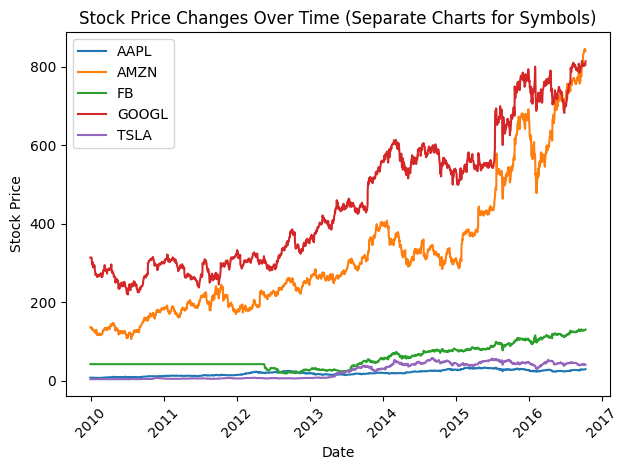

1.Market   2.Assets   3.Buy   4.Sell   5.Next day  6.Chart  7.Charts with regression   8.Exit8
Thank you for choosing us. Good luck.


In [9]:
print('Your account balance is:',p.credit)
while True:
    order=input("1.Market   2.Assets   3.Buy   4.Sell   5.Next day  6.Chart  7.Charts with regression   8.Exit")
    if order=='1':
        #Market()
        market.loc[market['Date']==dd.strftime("%Y-%m-%d")]
    elif order=='2':
        Assets()
    elif order=='3':
        Buy()
    elif order=='4':
        Sell()
    elif order=='5':
        dd=dd+ timedelta(days=1)
        print(dd)
    elif order=='6':
        chart()
    elif order=='7':
        reg()
    elif order=='8':
        print("Thank you for choosing us. Good luck.")
        Rewrite_credit(p.ID)
        break